In [1]:
import numpy as np      # For arrays
import pandas as pd     # Dataframes and manipulation
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# read csv file as Dataframe
sales = pd.read_csv("c:\For Internships & Job Applications\personal project\Sales Retail\supermarket sales\supermarket_sales - Sheet1.csv")
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [2]:
print(sales.shape)
print(sales.info())

(1000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin p

In [3]:
# Change name format to have underscore
sales.rename(columns={
    "Invoice ID": "Invoice_ID",
    "Customer type": "Customer_type",
    "Product line": "Product_line",
    "Unit price": "Unit_price",
    "Tax 5%": "Tax_5%",
    "gross margin percentage": "gross_margin_percentage",
    "gross income": "gross_income"
}, inplace=True)

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice_ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer_type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product_line             1000 non-null   object 
 6   Unit_price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax_5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

In [4]:
# Preparing training and testing datasets
# 70% train 30% test
X = sales.drop(columns=["Total"])
y = sales["Total"]

seed = np.random.randint(0, 1000)
print(seed)

411


In [5]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train.shape, X_test.shape

((700, 16), (300, 16))

In [6]:
X_train.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
794,702-72-0487,A,Yangon,Normal,Female,Electronic accessories,46.61,2,4.6610,2/26/2019,12:28,Credit card,93.22,4.761905,4.6610,6.6
665,518-17-2983,A,Yangon,Normal,Female,Fashion accessories,48.63,4,9.7260,2/4/2019,15:44,Ewallet,194.52,4.761905,9.7260,7.6
562,134-54-4720,B,Mandalay,Normal,Female,Electronic accessories,42.42,8,16.9680,1/30/2019,13:58,Ewallet,339.36,4.761905,16.9680,5.7
127,189-08-9157,C,Naypyitaw,Normal,Female,Fashion accessories,31.73,9,14.2785,1/8/2019,16:17,Credit card,285.57,4.761905,14.2785,5.9
490,686-41-0932,B,Mandalay,Normal,Female,Fashion accessories,34.70,2,3.4700,3/13/2019,19:48,Ewallet,69.40,4.761905,3.4700,8.2


In [7]:
y_train.head()

794     97.8810
665    204.2460
562    356.3280
127    299.8485
490     72.8700
Name: Total, dtype: float64

In [8]:
X_train_copy = X_train.copy()
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 794 to 988
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice_ID               700 non-null    object 
 1   Branch                   700 non-null    object 
 2   City                     700 non-null    object 
 3   Customer_type            700 non-null    object 
 4   Gender                   700 non-null    object 
 5   Product_line             700 non-null    object 
 6   Unit_price               700 non-null    float64
 7   Quantity                 700 non-null    int64  
 8   Tax_5%                   700 non-null    float64
 9   Date                     700 non-null    object 
 10  Time                     700 non-null    object 
 11  Payment                  700 non-null    object 
 12  cogs                     700 non-null    float64
 13  gross_margin_percentage  700 non-null    float64
 14  gross_income             700 

In [9]:
X_train_copy.isnull().sum()

Invoice_ID                 0
Branch                     0
City                       0
Customer_type              0
Gender                     0
Product_line               0
Unit_price                 0
Quantity                   0
Tax_5%                     0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
Rating                     0
dtype: int64

In [10]:
num_data = X_train_copy.select_dtypes(exclude=["object"])
num_data.head()

,Unit_price,Quantity,Tax_5%,cogs,gross_margin_percentage,gross_income,Rating
794,46.61,2,4.6610,93.22,4.761905,4.6610,6.6
665,48.63,4,9.7260,194.52,4.761905,9.7260,7.6
562,42.42,8,16.9680,339.36,4.761905,16.9680,5.7
127,31.73,9,14.2785,285.57,4.761905,14.2785,5.9
490,34.70,2,3.4700,69.40,4.761905,3.4700,8.2


In [11]:
num_data.describe()

,Unit_price,Quantity,Tax_5%,cogs,gross_margin_percentage,gross_income,Rating
count,700.000000,700.000000,700.000000,700.000000,7.000000e+02,700.000000,700.000000
mean,55.354986,5.510000,15.308504,306.170071,4.761905e+00,15.308504,6.995286
std,26.271487,2.942202,11.660828,233.216554,5.244000e-14,11.660828,1.725337
min,10.080000,1.000000,0.508500,10.170000,4.761905e+00,0.508500,4.000000
25%,32.425000,3.000000,5.799750,115.995000,4.761905e+00,5.799750,5.600000
50%,54.480000,6.000000,12.115000,242.300000,4.761905e+00,12.115000,7.000000
75%,77.690000,8.000000,22.515250,450.305000,4.761905e+00,22.515250,8.500000
max,99.890000,10.000000,49.650000,993.000000,4.761905e+00,49.650000,10.000000


<Axes: ylabel='Unit_price'>

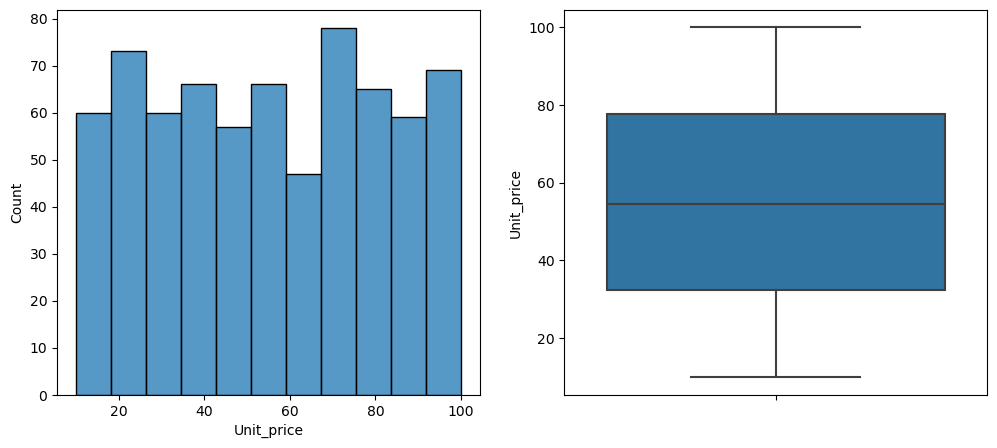

In [12]:
# Visualize data
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=X_train_copy, x="Unit_price", ax=ax[0])
sns.boxplot(data=X_train_copy, y="Unit_price", ax=ax[1])

In [13]:
def visualize_numeric_feature(dataframe, col_name):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(data=dataframe, x=col_name, ax=ax[0])
    sns.boxplot(data=dataframe, y=col_name, ax=ax[1])

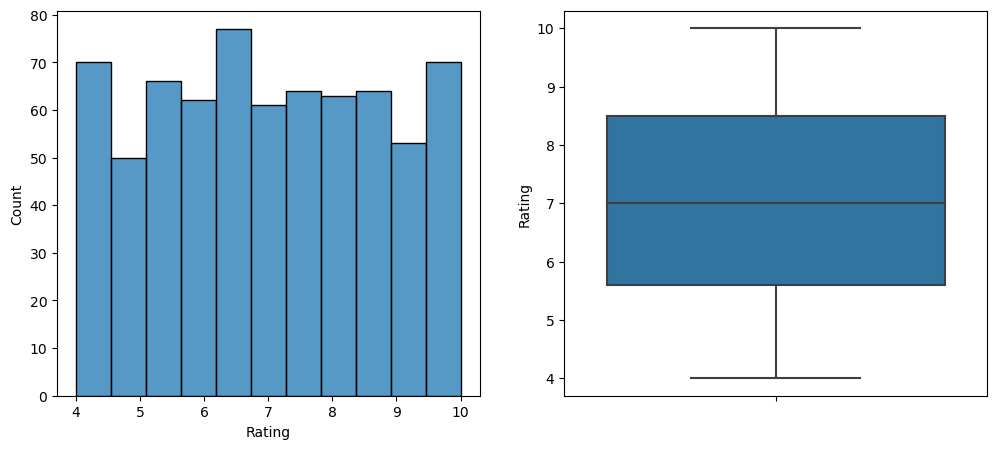

In [14]:
visualize_numeric_feature(X_train_copy, 'Rating')

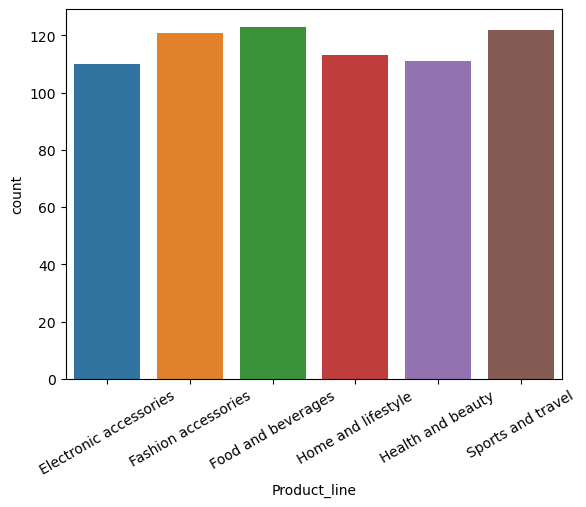

In [15]:
sns.countplot(data=X_train_copy, x="Product_line")
plt.xticks(rotation=30);

In [16]:
cat_feature = X_train_copy.select_dtypes(include=["object"])
cat_feature.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Date,Time,Payment
794,702-72-0487,A,Yangon,Normal,Female,Electronic accessories,2/26/2019,12:28,Credit card
665,518-17-2983,A,Yangon,Normal,Female,Fashion accessories,2/4/2019,15:44,Ewallet
562,134-54-4720,B,Mandalay,Normal,Female,Electronic accessories,1/30/2019,13:58,Ewallet
127,189-08-9157,C,Naypyitaw,Normal,Female,Fashion accessories,1/8/2019,16:17,Credit card
490,686-41-0932,B,Mandalay,Normal,Female,Fashion accessories,3/13/2019,19:48,Ewallet


In [17]:
cat_feature.describe()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Date,Time,Payment
count,700,700,700,700,700,700,700,700,700
unique,700,3,3,2,2,6,89,421,3
top,702-72-0487,A,Yangon,Member,Female,Food and beverages,2/7/2019,19:48,Cash
freq,1,244,244,358,354,123,19,6,240


In [18]:
cat_feature.isnull().sum()

Invoice_ID       0
Branch           0
City             0
Customer_type    0
Gender           0
Product_line     0
Date             0
Time             0
Payment          0
dtype: int64

In [19]:
pd.unique(cat_feature["Product_line"])

array(['Electronic accessories', 'Fashion accessories',
       'Food and beverages', 'Home and lifestyle', 'Health and beauty',
       'Sports and travel'], dtype=object)

In [20]:
#X_train_copy['Product_line'] = X_train_copy['Product_line'].map({
#    'Electronic accessories': 'EA',
#    'Health and beauty': 'HAB',
#    'Fashion accessories': 'FA',
#    'Sports and travel': 'SAT',
#    'Food and beverages': 'FAB',
#    'Home and lifestyle': 'HAL'
#})

#pd.unique(X_train_copy['Product_line'])